In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [4]:
data = boston["data"]
data.shape

(506, 13)

In [5]:
feature_names = boston["feature_names"]
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
target = boston['target']

In [8]:
X = pd.DataFrame(data, columns = feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
y = pd.DataFrame(target, columns=["price"])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)


In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
colnames = X.columns
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=colnames)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=colnames)

In [15]:
X_train_scaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,-1.846708e-16,6.375538e-17,3.063556e-15,-5.056461e-17,-5.222445e-15,-4.018788e-15,-9.904069e-16,-3.396623e-16,-2.748077e-17,-1.516938e-16,1.999721e-14,5.737984e-15,-1.725792e-16
std,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00
min,-4.061414e-01,-5.003201e-01,-1.487791e+00,-2.780887e-01,-1.458711e+00,-3.461733e+00,-2.348206e+00,-1.258391e+00,-9.740476e-01,-1.307684e+00,-2.568944e+00,-3.892249e+00,-1.510559e+00
25%,-3.979761e-01,-5.003201e-01,-8.502733e-01,-2.780887e-01,-8.887828e-01,-6.003488e-01,-8.228264e-01,-8.081981e-01,-6.243599e-01,-7.533563e-01,-6.821011e-01,2.098797e-01,-8.005057e-01
50%,-3.776748e-01,-5.003201e-01,-3.521669e-01,-2.780887e-01,-1.572334e-01,-1.494427e-01,3.270201e-01,-2.971196e-01,-5.077973e-01,-4.460660e-01,1.714705e-01,3.830012e-01,-2.157763e-01
75%,-4.582119e-02,3.645893e-01,1.033237e+00,-2.780887e-01,6.338607e-01,4.528240e-01,8.974727e-01,7.481981e-01,3.081406e-01,1.578434e+00,8.453428e-01,4.316600e-01,5.513070e-01
max,9.630689e+00,3.824227e+00,2.433163e+00,3.595975e+00,2.675394e+00,3.477564e+00,1.124581e+00,3.907900e+00,1.706891e+00,1.849573e+00,1.653990e+00,4.441800e-01,3.592534e+00


In [17]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse



In [18]:
def reduce_dims(df, dims=2, method='pca', perplexity=30):
    
    assert method in ['pca', 'tsne'], 'Неверно указан метод'
    
    if method=='pca':
        dim_reducer = PCA(n_components=dims, random_state=42)
        components = dim_reducer.fit_transform(df)
    elif method == 'tsne':
        dim_reducer = TSNE(n_components=dims, learning_rate=250, random_state=42, perplexity=perplexity)
        components = dim_reducer.fit_transform(df)
    else:
        print('Error')
        
    colnames = ['component_' + str(i) for i in range(1, dims+1)]
    return dim_reducer, pd.DataFrame(data = components, columns = colnames) 

In [19]:
def display_components_in_2D_space(components_df, labels=None):
    components_with_labels_df = pd.concat([components_df, pd.DataFrame(labels)], axis=1)

    figsize = (10, 7)
    if labels is not None:
        components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2', 
                                         c=components_with_labels_df.iloc[:, -1], cmap=plt.get_cmap('jet'),
                                         alpha=0.5, figsize=figsize)
    else:
        components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2', alpha=0.5, figsize=figsize)

    plt.xlabel('component_1')
    plt.ylabel('component_2')
    plt.title('2D mapping of objects')    
    plt.show()

def display_components_in_3D_space(components_df, labels=None):
    components_with_labels_df = pd.concat([components_df, pd.DataFrame(labels)], axis=1)

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    
    if labels is not None:
        ax.scatter(components_with_labels_df['component_1'], 
                   components_with_labels_df['component_2'], 
                   components_with_labels_df['component_3'], 
                   c=components_with_labels_df.iloc[:, -1], 
                   cmap=plt.get_cmap('jet'), alpha=0.5)
    else:
        ax.scatter(components_with_labels_df['component_1'], 
                   components_with_labels_df['component_2'], 
                   components_with_labels_df['component_3'], 
                   alpha=0.5)

    ax.set_xlabel('component_1')
    ax.set_ylabel('component_2')
    ax.set_zlabel('component_3')
    plt.title('3D mapping of objects')
    plt.show()

In [21]:
dim_reducer2d_tsne, components_2d_tsne = reduce_dims(X_train_scaled, dims=2, method='tsne', perplexity=35)
components_2d_tsne.head(2)

,component_1,component_2
0,18.000010,24.091993
1,-5.508647,-10.048131


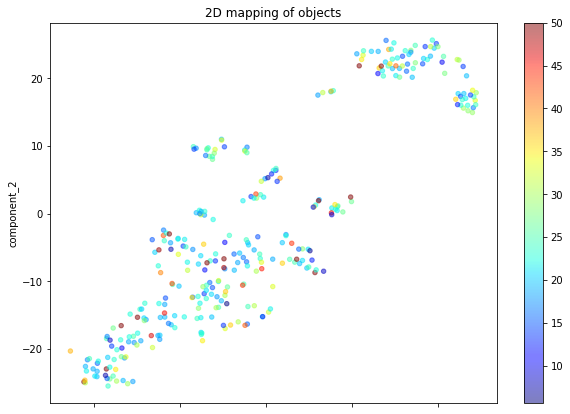

In [22]:
display_components_in_2D_space(components_2d_tsne, y_train)

In [23]:
dim_reducer3d_tsne, components_3d_tsne = reduce_dims(X_train_scaled, dims=3, method='tsne')
components_3d_tsne.head(2)

,component_1,component_2,component_3
0,-38.284981,-34.244915,86.234932
1,8.281599,79.982353,29.087164


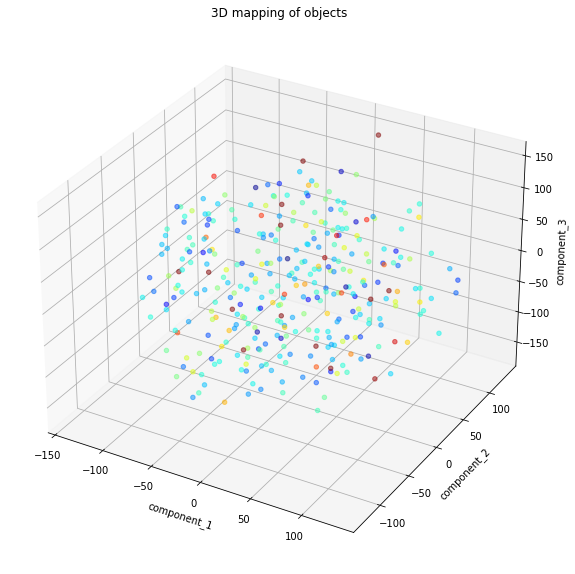

In [24]:
display_components_in_3D_space(components_3d_tsne, y_train)

In [25]:
from sklearn.cluster import KMeans

In [26]:
def display_clusters_distribution(unique_labels, labels_counts):
    """Визуализация распределения классов по кластерам"""
    plt.figure(figsize=(8,5))

    plt.bar(unique, counts)

    plt.xlabel('Clusters')
    plt.xticks(unique)
    plt.ylabel('Count')
    plt.title('Clusters distribution')
    plt.show()

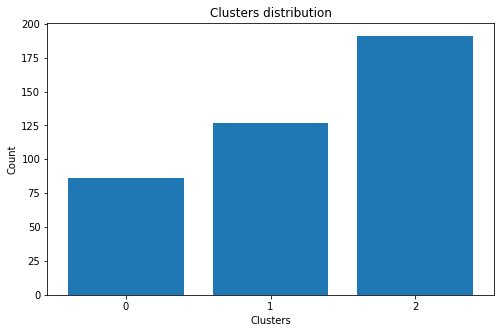

In [27]:
kmeans_3 = KMeans(n_clusters=3, random_state=42)
labels_clast_3 = kmeans_3.fit_predict(X_train_scaled)
labels_clast_3 = pd.Series(labels_clast_3, name='clusters_3')

labels_clast_3_test = kmeans_3.predict(X_test_scaled)
labels_clast_3_test = pd.Series(labels_clast_3_test, name='clusters_3')

unique, counts = np.unique(labels_clast_3, return_counts=True)
display_clusters_distribution(unique, counts)

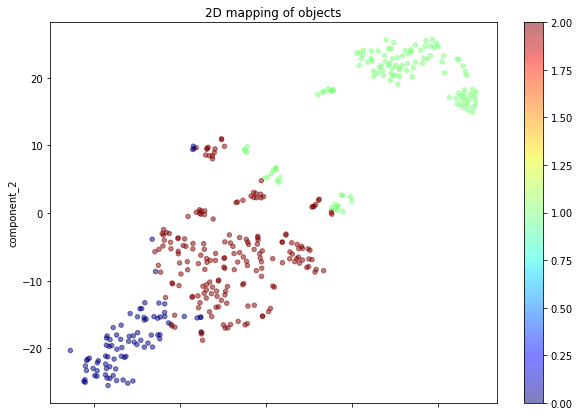

In [29]:
display_components_in_2D_space(components_2d_tsne, labels_clast_3)

In [33]:
df = X_train["CRIM"]
df = pd.concat([df, labels_clast_3, y_train], axis=1)
gr = df.groupby("clusters_3")
gr.agg(({"price": "mean", "CRIM": "mean"}))

,price,CRIM
clusters_3,,
0.0,24.046575,2.859222
1.0,24.070000,1.481395
2.0,24.708974,1.718656


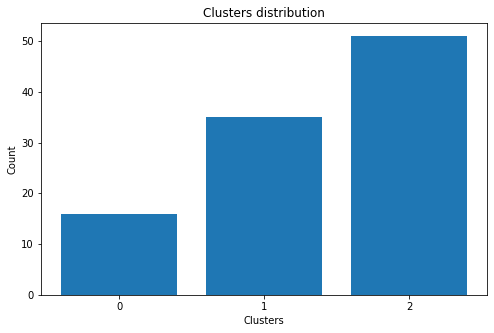

In [34]:
unique, counts = np.unique(labels_clast_3_test, return_counts=True)
display_clusters_distribution(unique, counts)

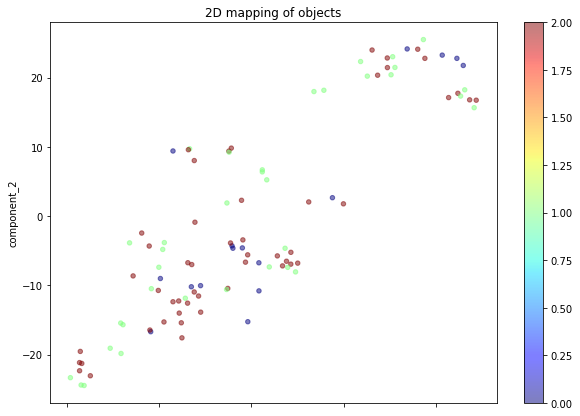

In [35]:
display_components_in_2D_space(components_2d_tsne, labels_clast_3_test)

In [36]:
df = X_test["CRIM"]
df = pd.concat([df, labels_clast_3_test, y_train], axis=1)
gr = df.groupby("clusters_3")
gr.agg(({"price": "mean", "CRIM": "mean"}))

,price,CRIM
clusters_3,,
0.0,22.718182,0.251460
1.0,22.038462,0.188806
2.0,22.578378,0.244992
